In [22]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 

import pickle 
from pickle import dump
from pickle import load

### Importing a database we created

In [2]:
df = pd.read_csv('playlist_all.csv')

In [3]:
df

,song_name,name,song_id,popularity,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,2K,Nosaj Thing,33xMbeHzmWd6Od0BmLZEUs,0,0.310,0.445,7,-13.355,0,0.0863,...,0.1130,0.122,95.360,audio_features,33xMbeHzmWd6Od0BmLZEUs,spotify:track:33xMbeHzmWd6Od0BmLZEUs,https://api.spotify.com/v1/tracks/33xMbeHzmWd6...,https://api.spotify.com/v1/audio-analysis/33xM...,152560,3
1,4 Billion Souls,The Doors,3UnyplmZaq547hwsfOR5yy,26,0.419,0.565,5,-11.565,1,0.0347,...,0.1280,0.648,151.277,audio_features,3UnyplmZaq547hwsfOR5yy,spotify:track:3UnyplmZaq547hwsfOR5yy,https://api.spotify.com/v1/tracks/3UnyplmZaq54...,https://api.spotify.com/v1/audio-analysis/3Uny...,197707,4
2,4 Minute Warning,Radiohead,1w8QCSDH4QobcQeT4uMKLm,0,0.354,0.302,9,-13.078,1,0.0326,...,0.1110,0.223,123.753,audio_features,1w8QCSDH4QobcQeT4uMKLm,spotify:track:1w8QCSDH4QobcQeT4uMKLm,https://api.spotify.com/v1/tracks/1w8QCSDH4Qob...,https://api.spotify.com/v1/audio-analysis/1w8Q...,244285,4
3,7 Element,Vitas,7J9mBHG4J2eIfDAv5BehKA,0,0.727,0.785,5,-6.707,0,0.0603,...,0.3100,0.960,129.649,audio_features,7J9mBHG4J2eIfDAv5BehKA,spotify:track:7J9mBHG4J2eIfDAv5BehKA,https://api.spotify.com/v1/tracks/7J9mBHG4J2eI...,https://api.spotify.com/v1/audio-analysis/7J9m...,249940,4
4,#9 Dream,R.E.M.,1VZedwJj1gyi88WFRhfThb,6,0.571,0.724,0,-5.967,1,0.0260,...,0.0919,0.385,116.755,audio_features,1VZedwJj1gyi88WFRhfThb,spotify:track:1VZedwJj1gyi88WFRhfThb,https://api.spotify.com/v1/tracks/1VZedwJj1gyi...,https://api.spotify.com/v1/audio-analysis/1VZe...,278320,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16474,Apologize,OneRepublic,6ucR4KfvsBFWCMVFDvyKKl,75,0.653,0.604,8,-6.017,1,0.0278,...,0.0970,0.101,118.016,audio_features,6ucR4KfvsBFWCMVFDvyKKl,spotify:track:6ucR4KfvsBFWCMVFDvyKKl,https://api.spotify.com/v1/tracks/6ucR4KfvsBFW...,https://api.spotify.com/v1/audio-analysis/6ucR...,184400,4
16475,Goddamn Lonely Love - Remastered,Drive-By Truckers,241LK9hqfXJyWpQ7oClQSN,48,0.427,0.541,7,-7.042,1,0.0294,...,0.2230,0.153,119.094,audio_features,241LK9hqfXJyWpQ7oClQSN,spotify:track:241LK9hqfXJyWpQ7oClQSN,https://api.spotify.com/v1/tracks/241LK9hqfXJy...,https://api.spotify.com/v1/audio-analysis/241L...,301720,4
16476,Graveless yet Dead,Convocation,6hF9etLMoADWLsoui5ejGW,19,0.262,0.689,2,-8.342,1,0.0705,...,0.1170,0.178,130.110,audio_features,6hF9etLMoADWLsoui5ejGW,spotify:track:6hF9etLMoADWLsoui5ejGW,https://api.spotify.com/v1/tracks/6hF9etLMoADW...,https://api.spotify.com/v1/audio-analysis/6hF9...,572149,4
16477,Gimme! Gimme! Gimme! (A Man After Midnight),ABBA,3vkQ5DAB1qQMYO4Mr9zJN6,84,0.749,0.491,10,-9.655,1,0.0403,...,0.1590,0.536,119.528,audio_features,3vkQ5DAB1qQMYO4Mr9zJN6,spotify:track:3vkQ5DAB1qQMYO4Mr9zJN6,https://api.spotify.com/v1/tracks/3vkQ5DAB1qQM...,https://api.spotify.com/v1/audio-analysis/3vkQ...,292613,4


In [4]:
df.isna().sum().sum()

22

In [5]:
df = df.dropna()
df.shape

(16468, 22)

In [6]:
df = df.reset_index(drop=True)

In [7]:
df.shape

(16468, 22)

In [8]:
df.isna().sum().sum()

0

### features for clustering: X_audio

- for clustering we will need only numerical data
- checking which audio features should be here considered
- https://developer.spotify.com/documentation/web-api/reference/get-audio-features 

In [9]:
df.columns

Index(['song_name', 'name', 'song_id', 'popularity', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri',
       'track_href', 'analysis_url', 'duration_ms', 'time_signature'],
      dtype='object')

#### audio features to go to clustering:
- danceability
- energy
- acousticness
- key 
- loudness
- mode
- speechiness
- acousticness
- instrumentalness
- liveness
- valence
- tempo
- duration_ms
- time_signature
    
    
#### Other features, which will not be used to create clustering:    
- analysis_url
- popularity
- type
- id
- uri
- track_href
- analysis_url
- song_name
- name
- song_id

In [10]:
# df["type"].unique()

In [11]:
X_audio = df[["danceability", "energy", "acousticness", "key", "loudness", "mode", "speechiness", "acousticness",\
             "instrumentalness", "liveness", "valence", "tempo", "duration_ms", "time_signature"]]

In [12]:
X_audio

,danceability,energy,acousticness,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.310,0.445,0.094000,7,-13.355,0,0.0863,0.094000,0.06780,0.1130,0.122,95.360,152560,3
1,0.419,0.565,0.137000,5,-11.565,1,0.0347,0.137000,0.33700,0.1280,0.648,151.277,197707,4
2,0.354,0.302,0.590000,9,-13.078,1,0.0326,0.590000,0.07090,0.1110,0.223,123.753,244285,4
3,0.727,0.785,0.325000,5,-6.707,0,0.0603,0.325000,0.12600,0.3100,0.960,129.649,249940,4
4,0.571,0.724,0.023100,0,-5.967,1,0.0260,0.023100,0.00311,0.0919,0.385,116.755,278320,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,0.653,0.604,0.029200,8,-6.017,1,0.0278,0.029200,0.00000,0.0970,0.101,118.016,184400,4
16464,0.427,0.541,0.107000,7,-7.042,1,0.0294,0.107000,0.00481,0.2230,0.153,119.094,301720,4
16465,0.262,0.689,0.036600,2,-8.342,1,0.0705,0.036600,0.00833,0.1170,0.178,130.110,572149,4
16466,0.749,0.491,0.020000,10,-9.655,1,0.0403,0.020000,0.00899,0.1590,0.536,119.528,292613,4


### Scaling

In [13]:
scaler = StandardScaler().fit(X_audio) 

In [14]:
X_audio_scal = scaler.transform(X_audio)

In [15]:
pd.DataFrame(X_audio_scal,columns=X_audio.columns).head()

,danceability,energy,acousticness,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,-1.218173,-0.919981,-0.489922,0.492591,-1.346410,-1.333769,0.085004,-0.489922,-0.272619,-0.531763,-1.340098,-0.908037,-0.877600,-2.369716
1,-0.621386,-0.413669,-0.347450,-0.066355,-0.906863,0.749755,-0.546715,-0.347450,0.672106,-0.440033,0.744011,1.040131,-0.442000,0.212806
2,-0.977268,-1.523335,1.153471,1.051537,-1.278390,0.749755,-0.572425,1.153471,-0.261740,-0.543993,-0.939917,0.081185,0.007407,0.212806
3,1.064949,0.514569,0.275449,-0.066355,0.286052,-1.333769,-0.233304,0.275449,-0.068373,0.672959,1.980213,0.286604,0.061969,0.212806
4,0.210831,0.257194,-0.724834,-1.463721,0.467764,0.749755,-0.653226,-0.724834,-0.499641,-0.660796,-0.298043,-0.162628,0.335793,0.212806


### Creating a pickle of a scaler

In [17]:
pickle.dump(scaler, open('scaler.p', 'wb'))

### chosing k

In [18]:
kmeans = KMeans(n_clusters=5, random_state=1234)
kmeans.fit(X_audio_scal)

C:\Users\etak6\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=1234)

C:\Users\etak6\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\etak6\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\etak6\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\etak6\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\etak6\anaconda3\Lib\site-packages\sklearn\clust

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

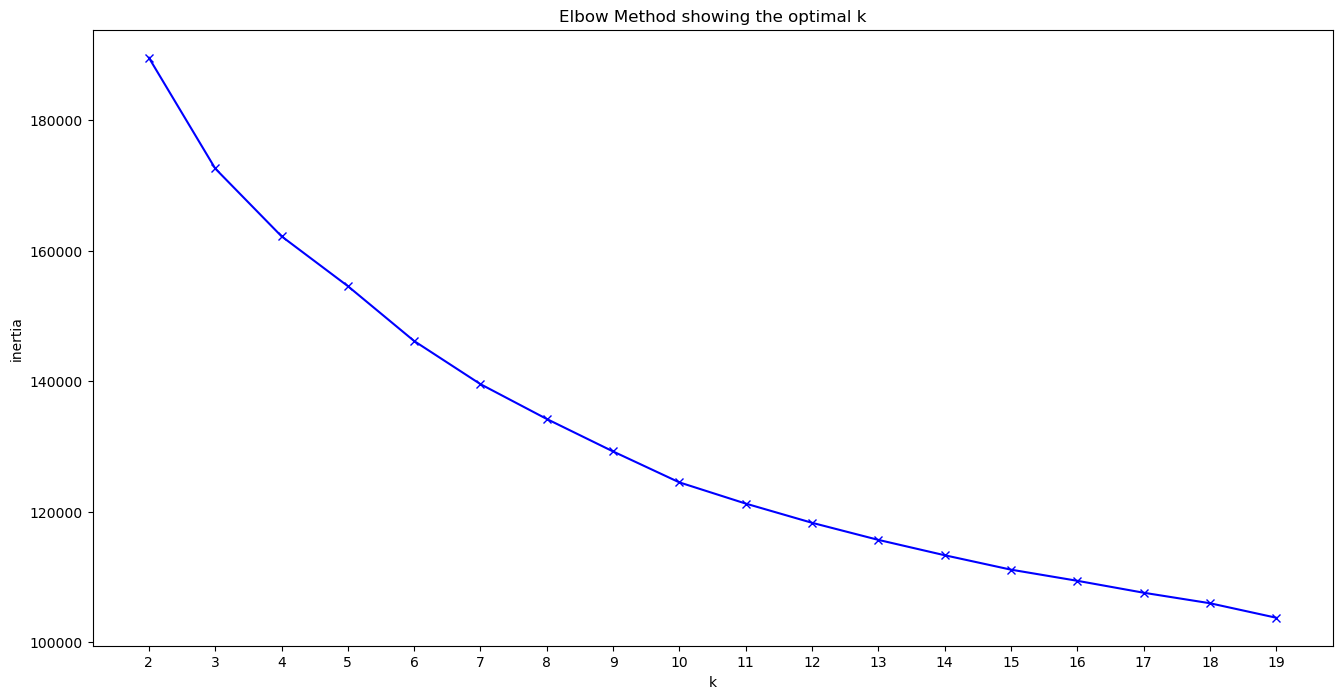

In [19]:
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_audio_scal)
    inertia.append(kmeans.inertia_)

%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

C:\Users\etak6\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\etak6\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\etak6\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\etak6\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\etak6\anaconda3\Lib\site-packages\sklearn\clust

Text(0.5, 1.0, 'Silhouette score showing the optimal k')

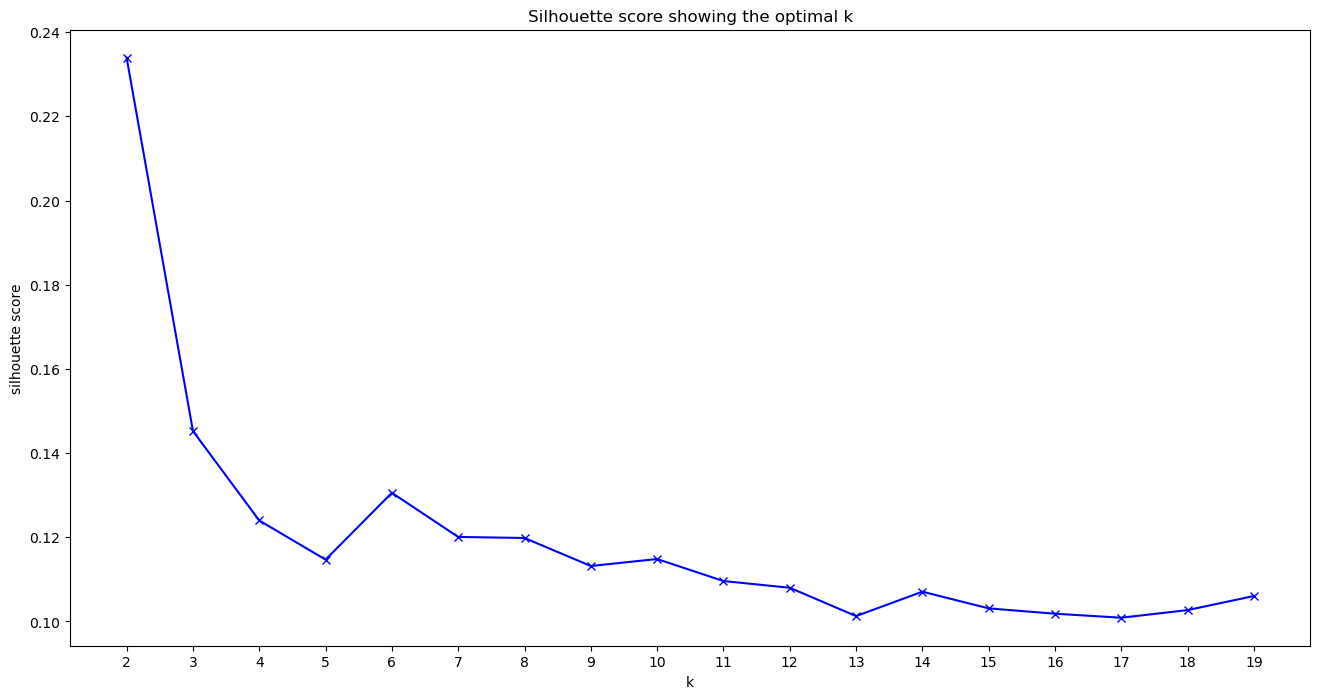

In [20]:
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_audio_scal)
    silhouette.append(silhouette_score(X_audio_scal, kmeans.predict(X_audio_scal)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette score showing the optimal k')

- The plot with ellbow score is not very clear, where the ellbow is. 
- Silhouette score has few high points: 2, 8, 10, 14.
- Considering the task we have (creating clusters for song recommendation) it would not be good to take too little clusters into consideration. In such case we would end have created pretty heterogen clusters with possibily different kinds of music. 
- This is why I would decide to take into consideration the k=10, which is still pretty high number of clusters. 

### Clustering songs

In [21]:
kmeans = KMeans(n_clusters=10, random_state=1234)
kmeans.fit(X_audio_scal)

C:\Users\etak6\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10, random_state=1234)

In [34]:
# Creating a pickle
dump(kmeans, open('kmeans_cluster_songs.p', 'wb'))   # writing a file

In [24]:
# Predicting / assigning the clusters:
clusters = kmeans.predict(X_audio_scal)

# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

0    2386
1    3631
2    2486
3     841
4    1143
5     984
6    1497
7    2931
8     437
9     132
Name: count, dtype: int64

In [25]:
clusters

array([7, 1, 2, ..., 8, 1, 8])

### Creating an output dataframe

In [26]:
col = ["cluster"]
df_a = pd.DataFrame(clusters, columns=col)
df_a   # dataframe with the feature "cluster"

,cluster
0,7
1,1
2,2
3,7
4,1
...,...
16463,1
16464,0
16465,8
16466,1


In [27]:
df_a.isna().sum().sum()

0

In [28]:
df

,song_name,name,song_id,popularity,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,2K,Nosaj Thing,33xMbeHzmWd6Od0BmLZEUs,0,0.310,0.445,7,-13.355,0,0.0863,...,0.1130,0.122,95.360,audio_features,33xMbeHzmWd6Od0BmLZEUs,spotify:track:33xMbeHzmWd6Od0BmLZEUs,https://api.spotify.com/v1/tracks/33xMbeHzmWd6...,https://api.spotify.com/v1/audio-analysis/33xM...,152560,3
1,4 Billion Souls,The Doors,3UnyplmZaq547hwsfOR5yy,26,0.419,0.565,5,-11.565,1,0.0347,...,0.1280,0.648,151.277,audio_features,3UnyplmZaq547hwsfOR5yy,spotify:track:3UnyplmZaq547hwsfOR5yy,https://api.spotify.com/v1/tracks/3UnyplmZaq54...,https://api.spotify.com/v1/audio-analysis/3Uny...,197707,4
2,4 Minute Warning,Radiohead,1w8QCSDH4QobcQeT4uMKLm,0,0.354,0.302,9,-13.078,1,0.0326,...,0.1110,0.223,123.753,audio_features,1w8QCSDH4QobcQeT4uMKLm,spotify:track:1w8QCSDH4QobcQeT4uMKLm,https://api.spotify.com/v1/tracks/1w8QCSDH4Qob...,https://api.spotify.com/v1/audio-analysis/1w8Q...,244285,4
3,7 Element,Vitas,7J9mBHG4J2eIfDAv5BehKA,0,0.727,0.785,5,-6.707,0,0.0603,...,0.3100,0.960,129.649,audio_features,7J9mBHG4J2eIfDAv5BehKA,spotify:track:7J9mBHG4J2eIfDAv5BehKA,https://api.spotify.com/v1/tracks/7J9mBHG4J2eI...,https://api.spotify.com/v1/audio-analysis/7J9m...,249940,4
4,#9 Dream,R.E.M.,1VZedwJj1gyi88WFRhfThb,6,0.571,0.724,0,-5.967,1,0.0260,...,0.0919,0.385,116.755,audio_features,1VZedwJj1gyi88WFRhfThb,spotify:track:1VZedwJj1gyi88WFRhfThb,https://api.spotify.com/v1/tracks/1VZedwJj1gyi...,https://api.spotify.com/v1/audio-analysis/1VZe...,278320,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,Apologize,OneRepublic,6ucR4KfvsBFWCMVFDvyKKl,75,0.653,0.604,8,-6.017,1,0.0278,...,0.0970,0.101,118.016,audio_features,6ucR4KfvsBFWCMVFDvyKKl,spotify:track:6ucR4KfvsBFWCMVFDvyKKl,https://api.spotify.com/v1/tracks/6ucR4KfvsBFW...,https://api.spotify.com/v1/audio-analysis/6ucR...,184400,4
16464,Goddamn Lonely Love - Remastered,Drive-By Truckers,241LK9hqfXJyWpQ7oClQSN,48,0.427,0.541,7,-7.042,1,0.0294,...,0.2230,0.153,119.094,audio_features,241LK9hqfXJyWpQ7oClQSN,spotify:track:241LK9hqfXJyWpQ7oClQSN,https://api.spotify.com/v1/tracks/241LK9hqfXJy...,https://api.spotify.com/v1/audio-analysis/241L...,301720,4
16465,Graveless yet Dead,Convocation,6hF9etLMoADWLsoui5ejGW,19,0.262,0.689,2,-8.342,1,0.0705,...,0.1170,0.178,130.110,audio_features,6hF9etLMoADWLsoui5ejGW,spotify:track:6hF9etLMoADWLsoui5ejGW,https://api.spotify.com/v1/tracks/6hF9etLMoADW...,https://api.spotify.com/v1/audio-analysis/6hF9...,572149,4
16466,Gimme! Gimme! Gimme! (A Man After Midnight),ABBA,3vkQ5DAB1qQMYO4Mr9zJN6,84,0.749,0.491,10,-9.655,1,0.0403,...,0.1590,0.536,119.528,audio_features,3vkQ5DAB1qQMYO4Mr9zJN6,spotify:track:3vkQ5DAB1qQMYO4Mr9zJN6,https://api.spotify.com/v1/tracks/3vkQ5DAB1qQM...,https://api.spotify.com/v1/audio-analysis/3vkQ...,292613,4


In [29]:
df.isna().sum()

song_name           0
name                0
song_id             0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
type                0
id                  0
uri                 0
track_href          0
analysis_url        0
duration_ms         0
time_signature      0
dtype: int64

In [30]:
df_final = pd.concat([df, df_a], axis=1)

In [31]:
df_final

,song_name,name,song_id,popularity,danceability,energy,key,loudness,mode,speechiness,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,cluster
0,2K,Nosaj Thing,33xMbeHzmWd6Od0BmLZEUs,0,0.310,0.445,7,-13.355,0,0.0863,...,0.122,95.360,audio_features,33xMbeHzmWd6Od0BmLZEUs,spotify:track:33xMbeHzmWd6Od0BmLZEUs,https://api.spotify.com/v1/tracks/33xMbeHzmWd6...,https://api.spotify.com/v1/audio-analysis/33xM...,152560,3,7
1,4 Billion Souls,The Doors,3UnyplmZaq547hwsfOR5yy,26,0.419,0.565,5,-11.565,1,0.0347,...,0.648,151.277,audio_features,3UnyplmZaq547hwsfOR5yy,spotify:track:3UnyplmZaq547hwsfOR5yy,https://api.spotify.com/v1/tracks/3UnyplmZaq54...,https://api.spotify.com/v1/audio-analysis/3Uny...,197707,4,1
2,4 Minute Warning,Radiohead,1w8QCSDH4QobcQeT4uMKLm,0,0.354,0.302,9,-13.078,1,0.0326,...,0.223,123.753,audio_features,1w8QCSDH4QobcQeT4uMKLm,spotify:track:1w8QCSDH4QobcQeT4uMKLm,https://api.spotify.com/v1/tracks/1w8QCSDH4Qob...,https://api.spotify.com/v1/audio-analysis/1w8Q...,244285,4,2
3,7 Element,Vitas,7J9mBHG4J2eIfDAv5BehKA,0,0.727,0.785,5,-6.707,0,0.0603,...,0.960,129.649,audio_features,7J9mBHG4J2eIfDAv5BehKA,spotify:track:7J9mBHG4J2eIfDAv5BehKA,https://api.spotify.com/v1/tracks/7J9mBHG4J2eI...,https://api.spotify.com/v1/audio-analysis/7J9m...,249940,4,7
4,#9 Dream,R.E.M.,1VZedwJj1gyi88WFRhfThb,6,0.571,0.724,0,-5.967,1,0.0260,...,0.385,116.755,audio_features,1VZedwJj1gyi88WFRhfThb,spotify:track:1VZedwJj1gyi88WFRhfThb,https://api.spotify.com/v1/tracks/1VZedwJj1gyi...,https://api.spotify.com/v1/audio-analysis/1VZe...,278320,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,Apologize,OneRepublic,6ucR4KfvsBFWCMVFDvyKKl,75,0.653,0.604,8,-6.017,1,0.0278,...,0.101,118.016,audio_features,6ucR4KfvsBFWCMVFDvyKKl,spotify:track:6ucR4KfvsBFWCMVFDvyKKl,https://api.spotify.com/v1/tracks/6ucR4KfvsBFW...,https://api.spotify.com/v1/audio-analysis/6ucR...,184400,4,1
16464,Goddamn Lonely Love - Remastered,Drive-By Truckers,241LK9hqfXJyWpQ7oClQSN,48,0.427,0.541,7,-7.042,1,0.0294,...,0.153,119.094,audio_features,241LK9hqfXJyWpQ7oClQSN,spotify:track:241LK9hqfXJyWpQ7oClQSN,https://api.spotify.com/v1/tracks/241LK9hqfXJy...,https://api.spotify.com/v1/audio-analysis/241L...,301720,4,0
16465,Graveless yet Dead,Convocation,6hF9etLMoADWLsoui5ejGW,19,0.262,0.689,2,-8.342,1,0.0705,...,0.178,130.110,audio_features,6hF9etLMoADWLsoui5ejGW,spotify:track:6hF9etLMoADWLsoui5ejGW,https://api.spotify.com/v1/tracks/6hF9etLMoADW...,https://api.spotify.com/v1/audio-analysis/6hF9...,572149,4,8
16466,Gimme! Gimme! Gimme! (A Man After Midnight),ABBA,3vkQ5DAB1qQMYO4Mr9zJN6,84,0.749,0.491,10,-9.655,1,0.0403,...,0.536,119.528,audio_features,3vkQ5DAB1qQMYO4Mr9zJN6,spotify:track:3vkQ5DAB1qQMYO4Mr9zJN6,https://api.spotify.com/v1/tracks/3vkQ5DAB1qQM...,https://api.spotify.com/v1/audio-analysis/3vkQ...,292613,4,1


In [32]:
df_final.isna().sum()

song_name           0
name                0
song_id             0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
type                0
id                  0
uri                 0
track_href          0
analysis_url        0
duration_ms         0
time_signature      0
cluster             0
dtype: int64

In [33]:
df_final.to_csv('df_final.csv', index=False)